**Cancer Prediction Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('D:\Cancer_prediction\Dataset\The_Cancer_data_1500_V2.csv')

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\0\AppData\Local\Temp\ipykernel_25868\3435237352.py:1: SyntaxWarning: invalid escape sequence '\C'
  df=pd.read_csv('D:\Cancer_prediction\Dataset\The_Cancer_data_1500_V2.csv')


In [10]:
df.head(5)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [11]:
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [7]:
df.shape

(1500, 9)

In [12]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis'],
      dtype='object')

In [14]:
df.isna().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

In [15]:
df.Diagnosis.value_counts()

Diagnosis
0    943
1    557
Name: count, dtype: int64

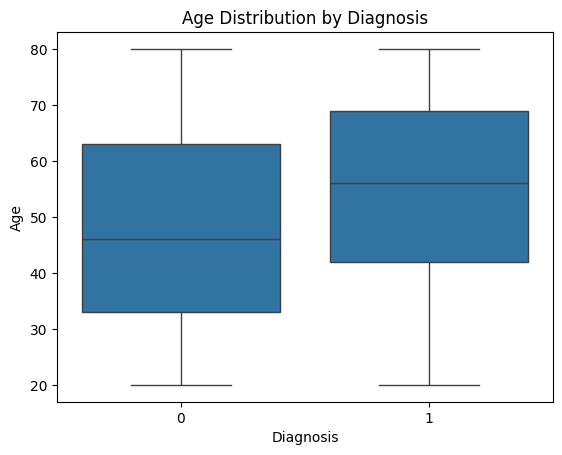

In [31]:
sns.boxplot(x='Diagnosis', y='Age', data=df)
plt.title("Age Distribution by Diagnosis")
plt.show()

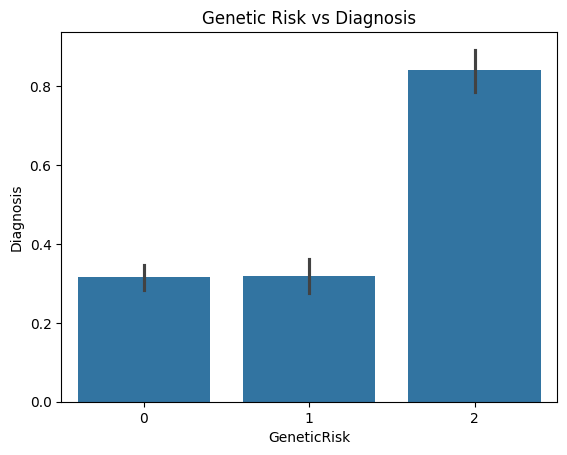

In [32]:
sns.barplot(x='GeneticRisk', y='Diagnosis', data=df)
plt.title("Genetic Risk vs Diagnosis")
plt.show()


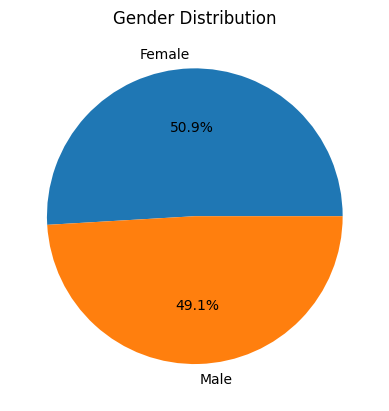

In [33]:
df['Gender'].replace({0: 'Female', 1: 'Male'}).value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


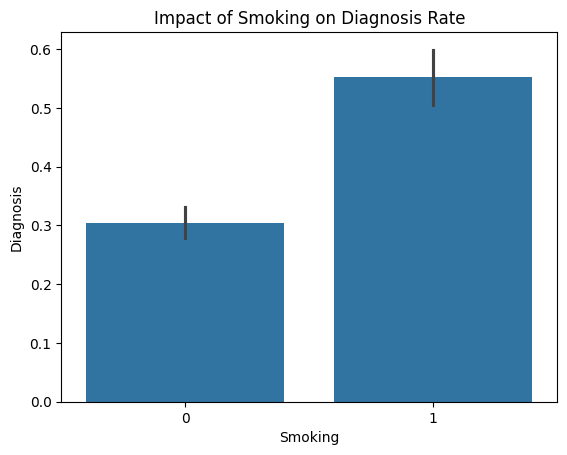

In [35]:
sns.barplot(x='Smoking', y='Diagnosis', data=df)
plt.title("Impact of Smoking on Diagnosis Rate")
plt.show()



**Data Prediction Model**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
X = df[['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity', 'AlcoholIntake', 'CancerHistory']]
y = df['Diagnosis']

In [18]:
scaler = StandardScaler()
X[['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']] = scaler.fit_transform(X[['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']])

C:\Users\0\AppData\Local\Temp\ipykernel_25868\444316299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']] = scaler.fit_transform(X[['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']])


In [19]:
X

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
0,0.435495,1,-1.581162,0,1,1.133713,1.219465,1
1,1.172662,0,0.458722,0,1,1.557899,0.776474,0
2,-0.131556,1,1.559544,0,2,0.082804,1.628353,0
3,-0.925428,0,0.349628,0,0,1.607166,-0.263137,0
4,0.662316,1,1.102219,0,0,0.160184,0.628583,0
...,...,...,...,...,...,...,...,...
1495,0.662316,1,-0.335284,0,0,1.743064,-0.799122,0
1496,-1.095543,0,0.820992,0,1,-1.127190,-0.096805,1
1497,0.719021,1,0.705703,1,1,-1.546514,-1.598404,0
1498,0.265380,0,-0.269122,0,0,1.011232,-0.304367,1


In [21]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((1125, 8), (375, 8), (1125,), (375,))

In [22]:
rfclf = RandomForestClassifier(n_estimators=20)
rfclf.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=20)

In [23]:
ypred = rfclf.predict(Xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       233
           1       0.95      0.87      0.90       142

    accuracy                           0.93       375
   macro avg       0.93      0.92      0.93       375
weighted avg       0.93      0.93      0.93       375



In [24]:
rfparams = {
    'n_estimators':50,
    'max_features':'log2',
    'criterion':'entropy',
    'bootstrap': False,
    'max_depth':15,
    'min_samples_split':5,
    'min_samples_leaf':3
}
rfclf2 = RandomForestClassifier(**rfparams)
rfclf2.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                       max_features='log2', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=50)

In [25]:
ypred2 = rfclf2.predict(Xtest)

In [26]:
print(classification_report(ypred2, ytest))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       242
           1       0.86      0.92      0.89       133

    accuracy                           0.92       375
   macro avg       0.91      0.92      0.91       375
weighted avg       0.92      0.92      0.92       375



In [28]:
print(confusion_matrix(ypred2, ytest))

[[222  20]
 [ 11 122]]


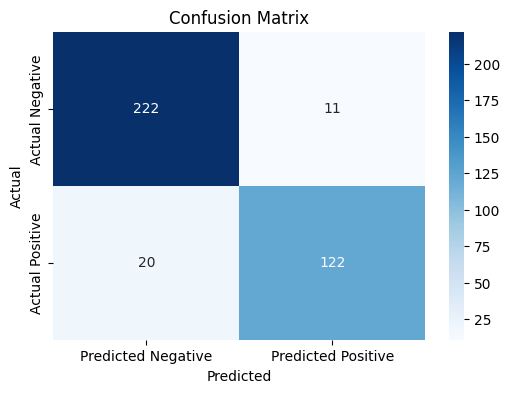

In [30]:
cm = confusion_matrix(ytest, ypred2)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.savefig('confusion_matrix.png')  
plt.show()